In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import utils as utils

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='medium'
plt.rcParams['pcolor.shading']='auto'

In [15]:
site='Hillarys'
ylims = (-1,1)

t1,t2 = '2000-01-01 00:00:00', '2003-01-01 00:00:00'
dsall = xr.open_dataset(f'../DATA/TIDES/{site}Tides_19922022.nc')
ds = dsall.sel(time=slice(t1,t2))
ds

<xarray.Dataset>
Dimensions:              (time: 26305)
Coordinates:
  * time                 (time) datetime64[ns] 2000-01-01 ... 2003-01-01
Data variables:
    waterlevel           (time) float64 ...
    Water Temperature    (time) float64 ...
    Air Temperature      (time) float64 ...
    Barometric Pressure  (time) float64 ...
    Residuals            (time) float64 ...
    Adjusted Residuals   (time) float64 ...
    Wind Direction       (time) int64 ...
    Wind Gust            (time) float64 ...
    Wind Speed           (time) float64 ...
    Hillarys             (time) float64 ...

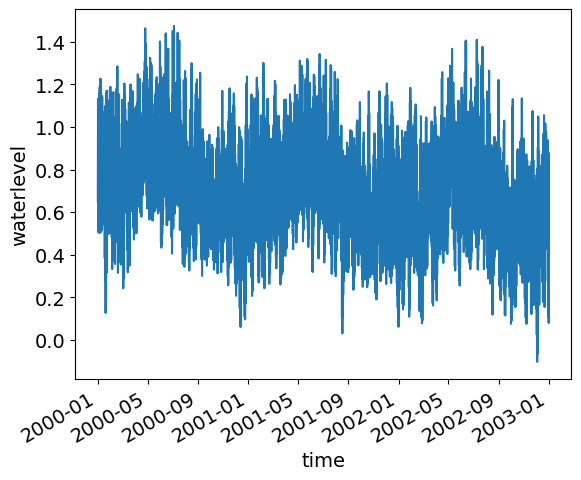

In [16]:
ds['waterlevel'].plot()

In [17]:
time = ds.time.values

#time_utc = time #- np.timedelta64(8*3600, 's')

dt = (time[1:]-time[:-1]).mean()
dtsec = dt.astype(float)*1e-9

# Important ssh = -1*airgap i.e. airgap grows when water level drops
ssh  = ds['waterlevel']
#ssh['time'] = time_utc
yf = utils.filt_decompose(ssh, dtsec, b1=30*86400, b2=60*3600)
#utils.filt_decompose?

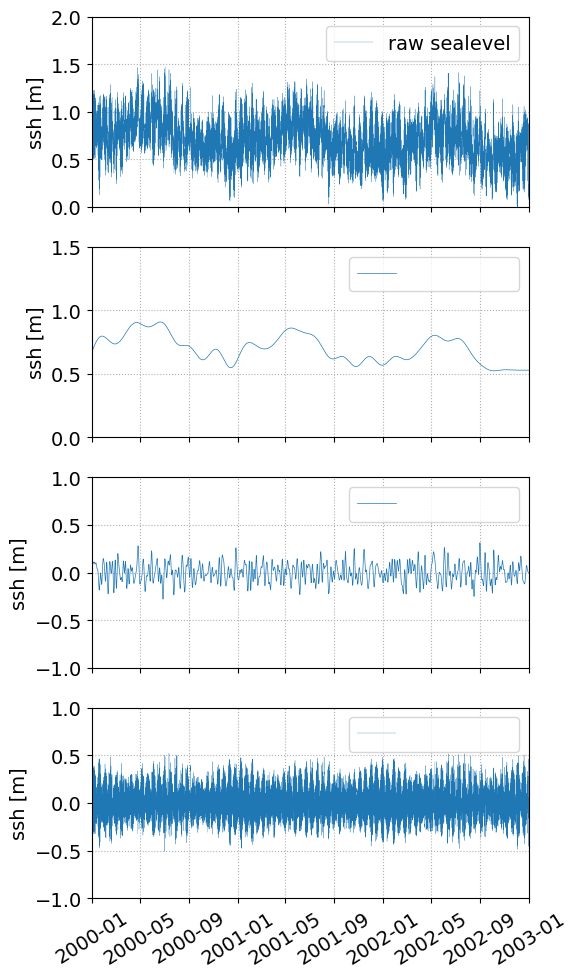

In [19]:
plt.figure(figsize=(6,10))

ax0 = plt.subplot(411)
ssh.plot(lw=0.2, label='raw sealevel')
ax0.set_xticklabels([])
plt.xlim(time[0], time[-1])
plt.ylim(0,2.)
plt.grid(True, ls=':')
plt.ylabel('ssh [m]')
plt.xlabel('')
plt.legend()

ax1 = plt.subplot(412,)
plt.plot(time, yf[:,0], lw=0.5, label='                ')
ax1.set_xticklabels([])
plt.xlim(time[0], time[-1])
plt.ylim(0, 1.5)
plt.grid(True, ls=':')
plt.ylabel('ssh [m]')
plt.legend()

ax2 = plt.subplot(413,)
plt.plot(time, yf[:,1], lw=0.5, label='                ')
ax2.set_xticklabels([])
plt.xlim(time[0], time[-1])
plt.ylim(-1., 1.)
plt.grid(True, ls=':')
plt.ylabel('ssh [m]')
plt.legend()

ax3 = plt.subplot(414, )
plt.plot(time, yf[:,2], lw=0.2, label='                ')
plt.xticks(rotation=32)
plt.xlim(time[0], time[-1])
plt.ylim(-1, 1)
plt.grid(True, ls=':')
plt.ylabel('ssh [m]')
plt.legend()

plt.tight_layout()
plt.savefig(f'../FIGURES/{site}_sealevel.png')